## CartPole Skating

> **Problema**: Kung nais ni Peter na makatakas mula sa lobo, kailangan niyang gumalaw nang mas mabilis kaysa rito. Titingnan natin kung paano matututo si Peter na mag-skate, partikular na panatilihin ang balanse, gamit ang Q-Learning.

Una, mag-install tayo ng gym at i-import ang mga kinakailangang library:


In [1]:
#code block 1

## Gumawa ng isang cartpole na kapaligiran


In [ ]:
#code block 2

Upang makita kung paano gumagana ang kapaligiran, magpatakbo tayo ng maikling simulasyon para sa 100 hakbang.


In [ ]:
#code block 3

Sa panahon ng simulasyon, kailangan nating makakuha ng mga obserbasyon upang makapagdesisyon kung paano kumilos. Sa katunayan, ibinabalik sa atin ng `step` na function ang kasalukuyang mga obserbasyon, reward function, at ang `done` na flag na nagpapahiwatig kung may saysay pa bang ipagpatuloy ang simulasyon o hindi:


In [ ]:
#code block 4

Makukuha natin ang pinakamaliit at pinakamalaking halaga ng mga numerong iyon:


In [5]:
#code block 5

[-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
[4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]


In [6]:
#code block 6

Tuklasin din natin ang iba pang paraan ng discretization gamit ang mga bins:


In [7]:
#code block 7

Sample bins for interval (-5,5) with 10 bins
 [-5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.]


Ngayon, magpatakbo tayo ng maikling pagsubok at obserbahan ang mga hiwalay na halaga ng kapaligiran.


In [8]:
#code block 8

(0, 0, -2, -2)
(0, 1, -2, -5)
(0, 2, -3, -8)
(0, 3, -5, -11)
(0, 3, -7, -14)
(0, 4, -10, -17)
(0, 3, -14, -15)
(0, 3, -17, -12)
(0, 3, -20, -16)
(0, 4, -23, -19)


In [12]:
#code block 9

In [13]:
#code block 10

In [14]:
#code block 11

0: 22.0, alpha=0.3, epsilon=0.9
5000: 70.1384, alpha=0.3, epsilon=0.9
10000: 121.8586, alpha=0.3, epsilon=0.9
15000: 149.6368, alpha=0.3, epsilon=0.9
20000: 168.2782, alpha=0.3, epsilon=0.9
25000: 196.7356, alpha=0.3, epsilon=0.9
30000: 220.7614, alpha=0.3, epsilon=0.9
35000: 233.2138, alpha=0.3, epsilon=0.9
40000: 248.22, alpha=0.3, epsilon=0.9
45000: 264.636, alpha=0.3, epsilon=0.9
50000: 276.926, alpha=0.3, epsilon=0.9
55000: 277.9438, alpha=0.3, epsilon=0.9
60000: 248.881, alpha=0.3, epsilon=0.9
65000: 272.529, alpha=0.3, epsilon=0.9
70000: 281.7972, alpha=0.3, epsilon=0.9
75000: 284.2844, alpha=0.3, epsilon=0.9
80000: 269.667, alpha=0.3, epsilon=0.9
85000: 273.8652, alpha=0.3, epsilon=0.9
90000: 278.2466, alpha=0.3, epsilon=0.9
95000: 269.1736, alpha=0.3, epsilon=0.9


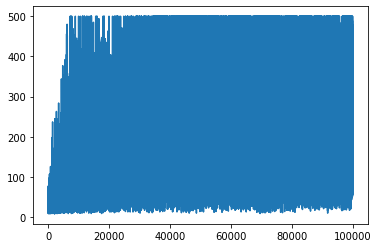

In [20]:
plt.plot(rewards)

Mula sa graph na ito, hindi posible na malaman ang anumang bagay, dahil sa likas na katangian ng stochastic na proseso ng pagsasanay, ang haba ng mga sesyon ng pagsasanay ay lubos na nagkakaiba. Upang mas magkaroon ng kahulugan ang graph na ito, maaari nating kalkulahin ang **running average** sa serye ng mga eksperimento, halimbawa 100. Magagawa ito nang madali gamit ang `np.convolve`:


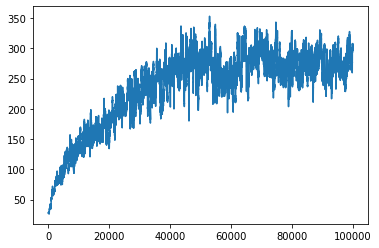

In [22]:
#code block 12

## Pag-iiba-iba ng mga Hyperparameter at Pagtingin sa Resulta sa Aksyon

Ngayon, magiging interesante na makita kung paano talaga gumagana ang na-train na modelo. Patakbuhin natin ang simulation, at susundin natin ang parehong estratehiya sa pagpili ng aksyon tulad noong training: pag-sample batay sa probability distribution sa Q-Table:


In [23]:
# code block 13

## Pag-save ng resulta bilang isang animated GIF

Kung nais mong magpasikat sa iyong mga kaibigan, maaari mong ipadala sa kanila ang animated GIF na larawan ng balancing pole. Para gawin ito, maaari nating gamitin ang `env.render` upang makabuo ng isang frame ng imahe, at pagkatapos ay i-save ang mga ito bilang animated GIF gamit ang PIL library:


In [26]:
from PIL import Image
obs = env.reset()
done = False
i=0
ims = []
while not done:
   s = discretize(obs)
   img=env.render(mode='rgb_array')
   ims.append(Image.fromarray(img))
   v = probs(np.array([Qbest.get((s,a),0) for a in actions]))
   a = random.choices(actions,weights=v)[0]
   obs,_,done,_ = env.step(a)
   i+=1
env.close()
ims[0].save('images/cartpole-balance.gif',save_all=True,append_images=ims[1::2],loop=0,duration=5)
print(i)

360



---

**Paunawa**:  
Ang dokumentong ito ay isinalin gamit ang AI translation service na [Co-op Translator](https://github.com/Azure/co-op-translator). Bagama't sinisikap naming maging tumpak, pakitandaan na ang mga awtomatikong pagsasalin ay maaaring maglaman ng mga pagkakamali o hindi pagkakatugma. Ang orihinal na dokumento sa orihinal nitong wika ang dapat ituring na opisyal na sanggunian. Para sa mahalagang impormasyon, inirerekomenda ang propesyonal na pagsasalin ng tao. Hindi kami mananagot sa anumang hindi pagkakaunawaan o maling interpretasyon na dulot ng paggamit ng pagsasaling ito.
